### Part A

In [2]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# 1.Import Libraries

In [3]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression,RidgeClassifier,RidgeClassifierCV,PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC,OneClassSVM
from sklearn.multiclass import OutputCodeClassifier,OneVsOneClassifier,OneVsRestClassifier
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network,multiclass
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')


Let's start by reading in the CE802_P2_Data.csv into a pandas dataframe

# 2.The Data 

In [4]:
df = pd.read_csv("CE802_P2_Data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.6430,0,-4894.24,-13.0281,-4.793400,0,5.1270,-17.1100,-63.340,3.61690,...,5.783440,-11315.46,22912.53,-0.4,103811.34,5.4380,1747.920,-4879.68,-41.58,False
1,0.5310,0,-5085.44,-16.2210,-3.991776,0,4.6256,-4.5800,-10.314,3.64880,...,8.180000,-12852.96,25696.44,-0.4,103884.02,5.0960,1496.080,-4186.38,-45.96,True
2,0.2640,0,-7021.44,-11.7591,-6.161700,0,4.3628,-14.7118,-6.806,3.62830,...,5.760312,-11012.16,20232.84,-1.4,103987.08,2.3652,1523.412,-4067.28,NaN,False
3,0.3196,1,-4648.76,-11.8110,-4.217700,0,8.9380,-7.5360,-4.670,3.01503,...,6.437100,-10297.86,23592.84,-1.4,103842.08,4.4080,1506.810,1352.52,NaN,True
4,4.0800,0,-4877.20,-11.2635,-8.061000,1,6.2800,-14.5805,-45.920,3.60030,...,6.393200,-11527.38,24778.74,-1.4,103842.48,3.1334,1581.790,-5095.88,-45.93,True


# 3.Exploratory Data Analysis:
    
Let's us begin some exploratory data analysis! we'll start by checking out missing data!

# A. Missing Data

we will be using plottly & seaborn to create some visulisation to see where we are missing the data.

In [5]:
# using info() methods we get the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   int64  
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   float64
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     500 non-null    float64
 21  Class   1000 non-null   bool   
dtypes

In [6]:
# the describe() method will shows us, the summary statistic of the dataframe provided.
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,1.067873,0.507000,-5361.832102,-13.230040,-6.313792,0.481000,5.890532,-14.141708,-20.424599,3.938608,...,-3.621917,6.244264,-11630.293754,24105.732399,-0.929000,103949.541430,3.988717,1451.053607,-3933.396979,-44.650560
std,0.902763,0.500201,1494.941683,2.560369,1.842535,0.499889,1.799838,4.861641,20.571395,0.901204,...,1.805553,0.671938,1534.747192,3111.533532,0.499408,3376.459607,1.739357,246.538717,1405.781722,3.188244
min,0.112200,0.000000,-15323.440000,-23.889000,-14.613000,0.000000,3.942760,-29.850000,-163.680000,3.002990,...,-10.616000,5.760001,-23402.760000,10433.640000,-1.400000,96416.660000,2.144440,-139.080000,-11393.480000,-54.960000
25%,0.396475,0.000000,-5523.540000,-14.325000,-7.453500,0.000000,4.487150,-17.209750,-26.025000,3.261825,...,-4.447000,5.803685,-12032.460000,22905.300000,-1.400000,103814.590000,2.686650,1437.582500,-4495.635000,-46.875000
50%,0.783700,1.000000,-4984.540000,-12.416250,-5.912250,0.000000,5.309600,-14.180050,-14.284000,3.657250,...,-3.064500,5.993600,-11597.425500,23486.040000,-1.400000,103852.225000,3.478100,1504.890000,-4210.100000,-44.505000
75%,1.464250,1.000000,-4731.133500,-11.337000,-4.853100,1.000000,6.856500,-11.066750,-6.504000,4.307000,...,-2.234900,6.399525,-11223.660000,24446.265000,-0.400000,103890.880000,4.759000,1537.961250,-3746.730000,-42.450000
max,4.602000,1.000000,2722.560000,-10.533870,-3.991776,1.000000,12.744000,5.030000,-0.124656,7.555000,...,-1.644240,11.578000,-1190.760000,47423.640000,-0.400000,209390.660000,11.170000,3091.920000,5696.520000,-34.530000


In [7]:
# This method will detect the missing values.
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [8]:
# Here, we will use Unique method to find the unique in series object.

df['Class'].unique()


array([False,  True])

In [9]:
# In this section we have use 2 methods first is groupby :A groupby operation involves some combination of splitting the object, applying a function, and combining the results. 
# And the second method is nunique which return number of unique elements in the object.

count_unique = df.groupby('Class')['F21'].nunique()   # Apply unique function
print(count_unique)

Class
False    179
True     187
Name: F21, dtype: int64


<AxesSubplot:>

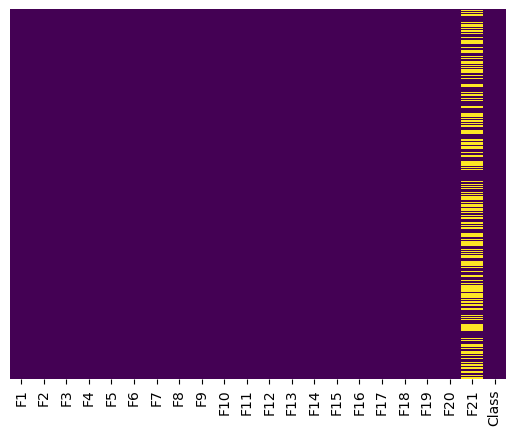

In [10]:
# We can use seaborn to create a simple heatmap to see where we are missing data!
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = "viridis")

Roughly 50 percent of the F21 data is missing. The porportion of F21 missing is likely medium enough for reasonable replacement with some form of imputation methods.




<AxesSubplot:xlabel='Class', ylabel='count'>

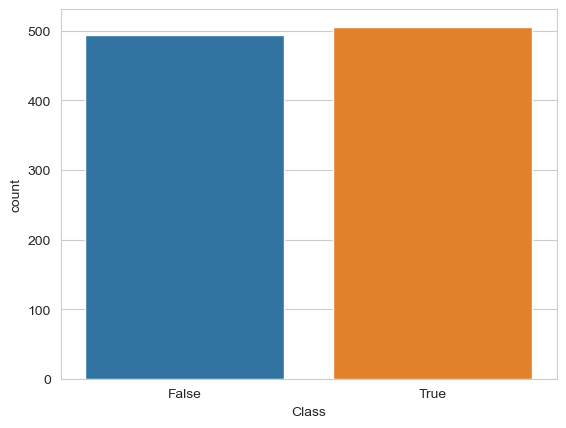

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df)

In [12]:
sns.set_style('whitegrid')
px.scatter(data_frame=df,x="Class",y='F21')

<AxesSubplot:xlabel='F21'>

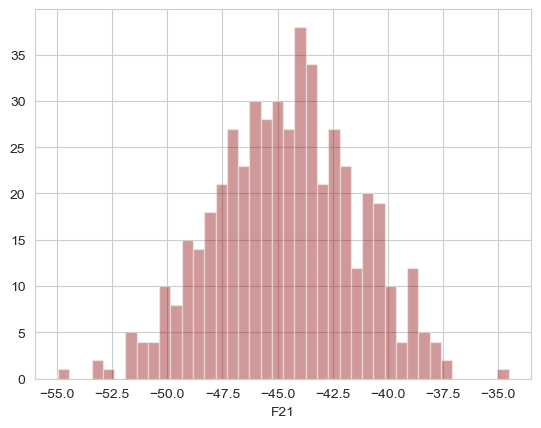

In [13]:
sns.distplot(df['F21'].dropna(),kde=False,color='darkred',bins=40)


# B. Data Cleaning.

We want to fill the misssing values of F21 data instead of just dropping the data rows. One way to do this is by using median methods.

<AxesSubplot:xlabel='Class', ylabel='F21'>

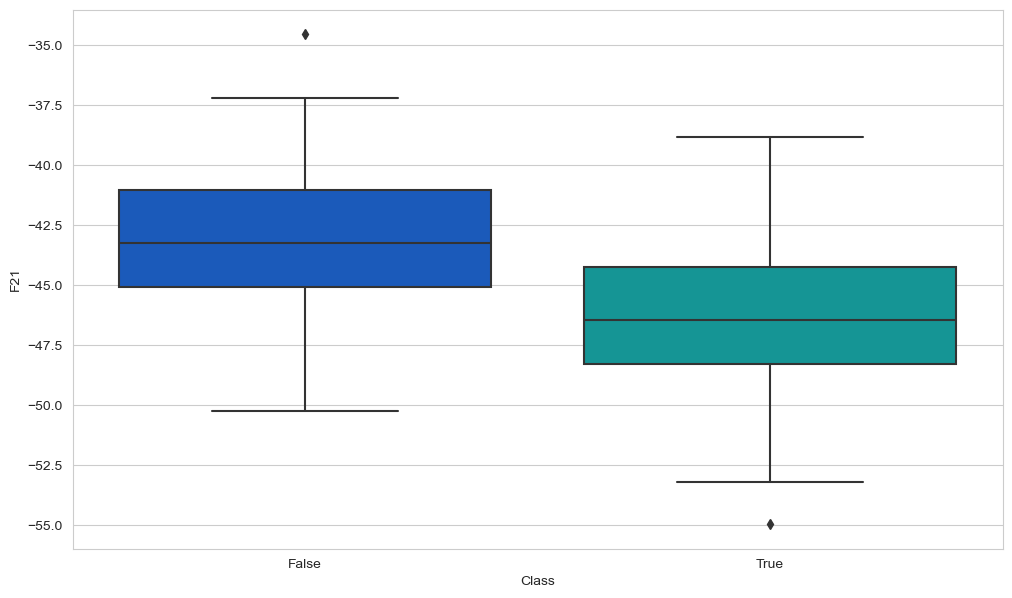

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Class',y='F21',data=df,palette='winter')


Here we can see that 50 percent of False in class lies on a average of -44, whereas true in class lies on a average of -46.5. So by average methods we can fill the missing values in F21 column.

In [15]:
def impute_F21(cols):
    F21 = cols[0]
    Class = cols[1]
    
    if pd.isnull(F21):

        if Class == False:
            return -44.0
        else:
            return -46.5

    else:
        return F21

In [16]:
df['F21'] = df[['F21','Class']].apply(impute_F21,axis=1)


<AxesSubplot:>

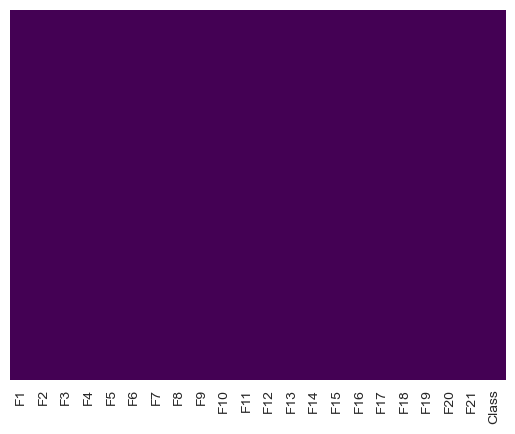

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = "viridis")

The heatmap show's that all the missing values has been removed.

# C. Converting the Categorical value into numerical value.



In [18]:
#Here,firstly we will change the data type of Class from Bool to interger and, Afterwards we will replace True with 1's & False value with 0's.
df['Class'] = df['Class'].astype(int)


In [19]:
mapping = {'False':0, 'True':1}


In [20]:
df['Class'].replace(mapping,inplace=True)


In [21]:
df['Class'].head()

0    0
1    1
2    0
3    1
4    1
Name: Class, dtype: int32

# 4.Feature Scaling

In [22]:
#Here,we are finding the correleation with dependent features vs  independent features.
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
F1,1.000000,-0.006990,-0.049583,0.002111,0.006976,0.005681,0.039438,0.005632,-0.049179,-0.045470,...,-0.025375,-0.002052,0.033486,0.014877,-0.019288,0.029807,-0.020761,-0.037730,-0.071187,0.048997
F2,-0.006990,1.000000,-0.009826,-0.050007,-0.007055,0.032559,0.012570,-0.042880,-0.011814,-0.016538,...,0.049109,-0.020466,-0.022925,-0.019222,-0.037403,-0.019879,0.070705,-0.019158,-0.028084,0.029837
F3,-0.049583,-0.009826,1.000000,0.006406,-0.004322,0.009380,0.003282,0.044698,0.001953,0.042462,...,-0.062524,0.296979,0.042754,-0.000864,0.016463,0.287894,0.029493,0.123040,-0.094596,0.018274
F4,0.002111,-0.050007,0.006406,1.000000,-0.068408,-0.016058,-0.000217,-0.006108,-0.020217,0.027008,...,-0.057872,0.063753,0.053769,0.012559,-0.045806,0.001481,0.037088,-0.033943,0.038460,0.007510
F5,0.006976,-0.007055,-0.004322,-0.068408,1.000000,0.004205,-0.025508,-0.037295,-0.000686,-0.006901,...,0.014207,0.008733,0.003705,0.031534,0.042314,0.064432,0.053084,0.044764,0.014963,0.026389
F6,0.005681,0.032559,0.009380,-0.016058,0.004205,1.000000,0.025433,-0.067913,0.010262,0.022900,...,-0.030887,0.016723,-0.025854,0.025858,0.025180,0.024911,-0.024538,0.026289,0.004781,0.010464
F7,0.039438,0.012570,0.003282,-0.000217,-0.025508,0.025433,1.000000,-0.019820,0.014276,-0.042789,...,-0.027272,0.037528,-0.228368,-0.002169,-0.014168,-0.003312,0.004320,0.004537,-0.001619,-0.022172
F8,0.005632,-0.042880,0.044698,-0.006108,-0.037295,-0.067913,-0.019820,1.000000,0.023469,-0.023646,...,0.012373,-0.021339,-0.000878,-0.026336,0.003288,-0.001644,-0.047412,0.019980,-0.045110,0.027641
F9,-0.049179,-0.011814,0.001953,-0.020217,-0.000686,0.010262,0.014276,0.023469,1.000000,0.042713,...,0.005803,0.020361,-0.005679,0.014585,0.018965,-0.018222,-0.024747,0.012361,0.014651,-0.045664
F10,-0.045470,-0.016538,0.042462,0.027008,-0.006901,0.022900,-0.042789,-0.023646,0.042713,1.000000,...,-0.012591,0.041041,-0.055473,0.069944,0.037891,0.011183,-0.000167,-0.213338,-0.044356,-0.039024


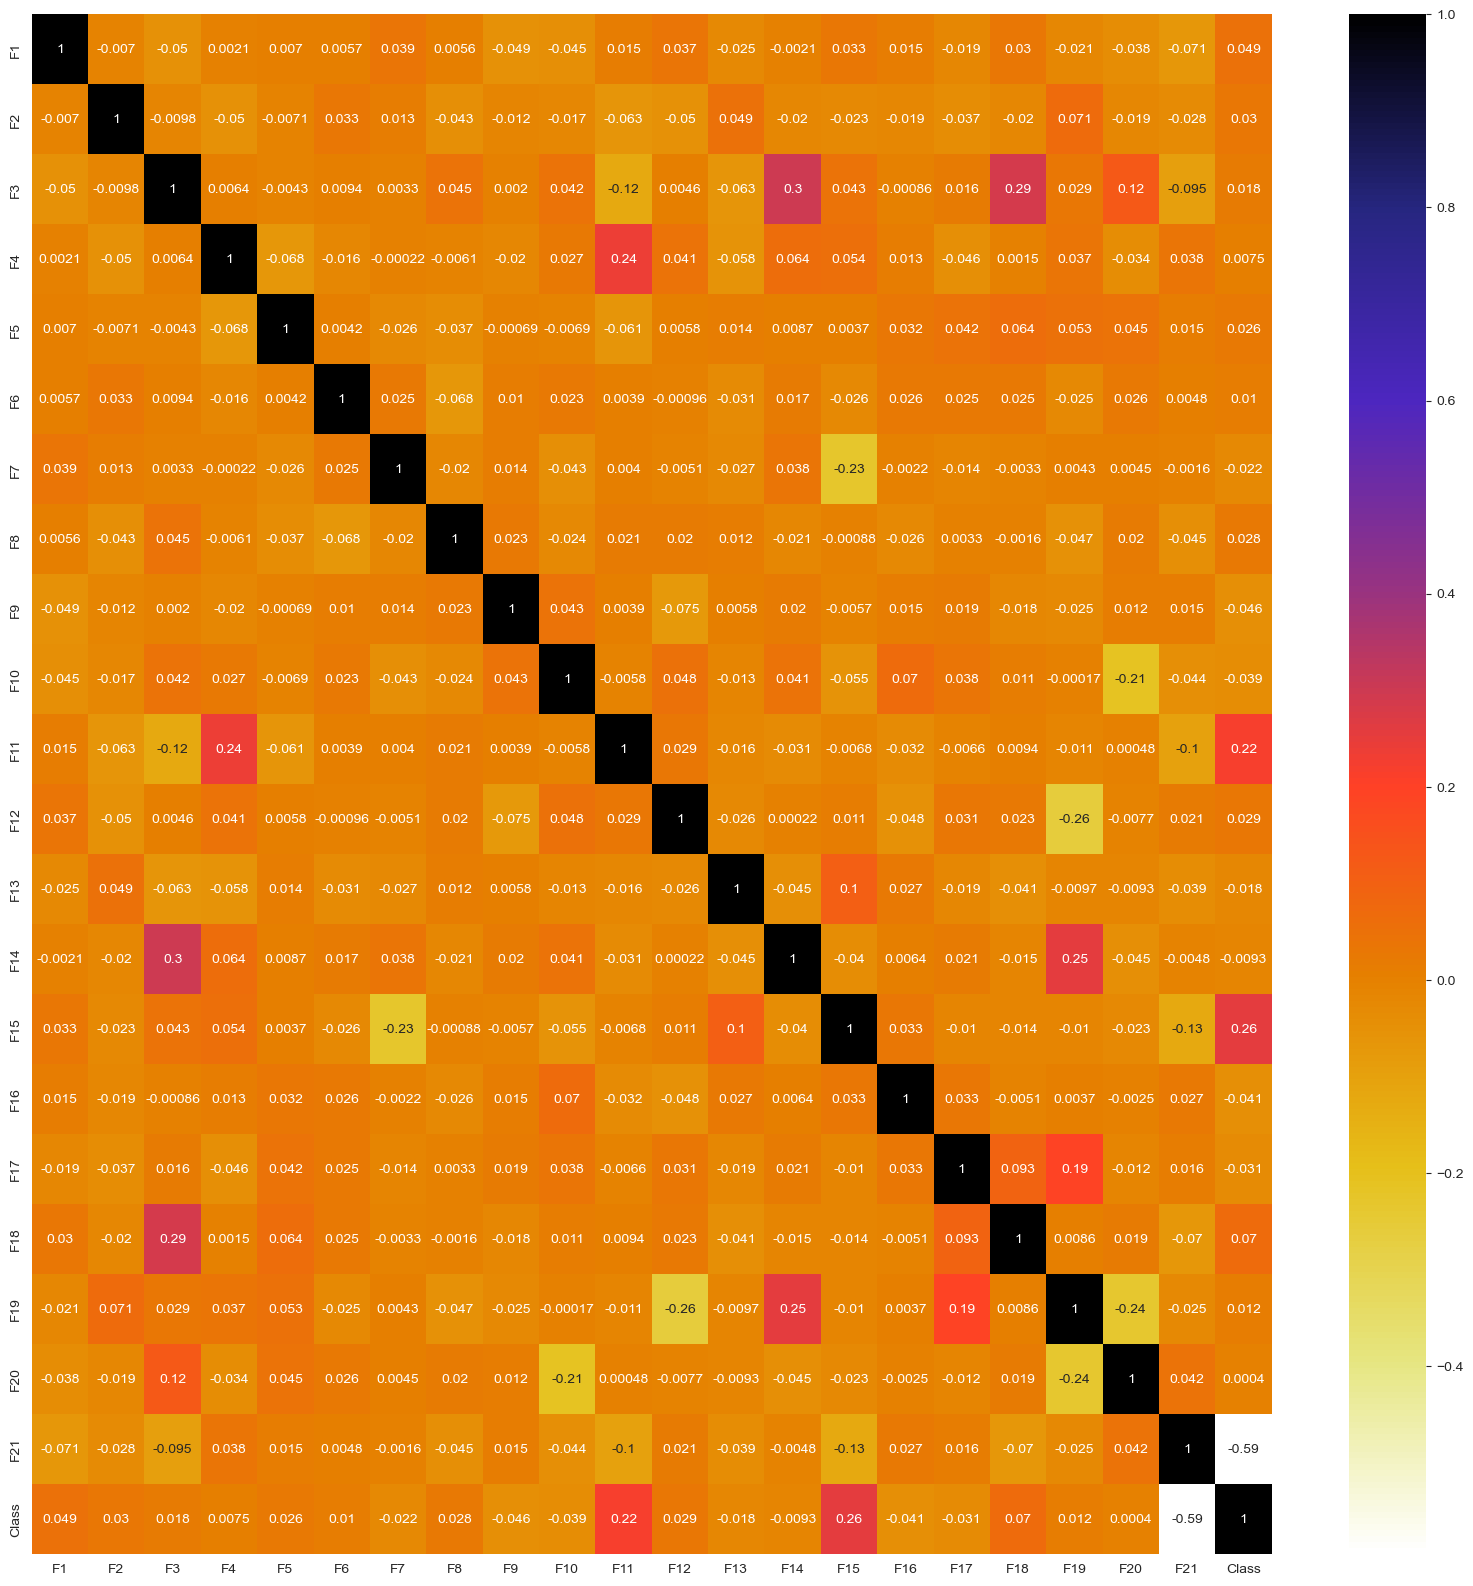

In [23]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
Y = df['Class']
df = df.drop('Class',axis = True)

In [25]:
#Here,we are finding the correleation with independent features vs  independent features.
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
F1,1.000000,-0.006990,-0.049583,0.002111,0.006976,0.005681,0.039438,0.005632,-0.049179,-0.045470,...,0.036955,-0.025375,-0.002052,0.033486,0.014877,-0.019288,0.029807,-0.020761,-0.037730,-0.071187
F2,-0.006990,1.000000,-0.009826,-0.050007,-0.007055,0.032559,0.012570,-0.042880,-0.011814,-0.016538,...,-0.049717,0.049109,-0.020466,-0.022925,-0.019222,-0.037403,-0.019879,0.070705,-0.019158,-0.028084
F3,-0.049583,-0.009826,1.000000,0.006406,-0.004322,0.009380,0.003282,0.044698,0.001953,0.042462,...,0.004553,-0.062524,0.296979,0.042754,-0.000864,0.016463,0.287894,0.029493,0.123040,-0.094596
F4,0.002111,-0.050007,0.006406,1.000000,-0.068408,-0.016058,-0.000217,-0.006108,-0.020217,0.027008,...,0.041286,-0.057872,0.063753,0.053769,0.012559,-0.045806,0.001481,0.037088,-0.033943,0.038460
F5,0.006976,-0.007055,-0.004322,-0.068408,1.000000,0.004205,-0.025508,-0.037295,-0.000686,-0.006901,...,0.005760,0.014207,0.008733,0.003705,0.031534,0.042314,0.064432,0.053084,0.044764,0.014963
F6,0.005681,0.032559,0.009380,-0.016058,0.004205,1.000000,0.025433,-0.067913,0.010262,0.022900,...,-0.000958,-0.030887,0.016723,-0.025854,0.025858,0.025180,0.024911,-0.024538,0.026289,0.004781
F7,0.039438,0.012570,0.003282,-0.000217,-0.025508,0.025433,1.000000,-0.019820,0.014276,-0.042789,...,-0.005135,-0.027272,0.037528,-0.228368,-0.002169,-0.014168,-0.003312,0.004320,0.004537,-0.001619
F8,0.005632,-0.042880,0.044698,-0.006108,-0.037295,-0.067913,-0.019820,1.000000,0.023469,-0.023646,...,0.020446,0.012373,-0.021339,-0.000878,-0.026336,0.003288,-0.001644,-0.047412,0.019980,-0.045110
F9,-0.049179,-0.011814,0.001953,-0.020217,-0.000686,0.010262,0.014276,0.023469,1.000000,0.042713,...,-0.074935,0.005803,0.020361,-0.005679,0.014585,0.018965,-0.018222,-0.024747,0.012361,0.014651
F10,-0.045470,-0.016538,0.042462,0.027008,-0.006901,0.022900,-0.042789,-0.023646,0.042713,1.000000,...,0.048212,-0.012591,0.041041,-0.055473,0.069944,0.037891,0.011183,-0.000167,-0.213338,-0.044356


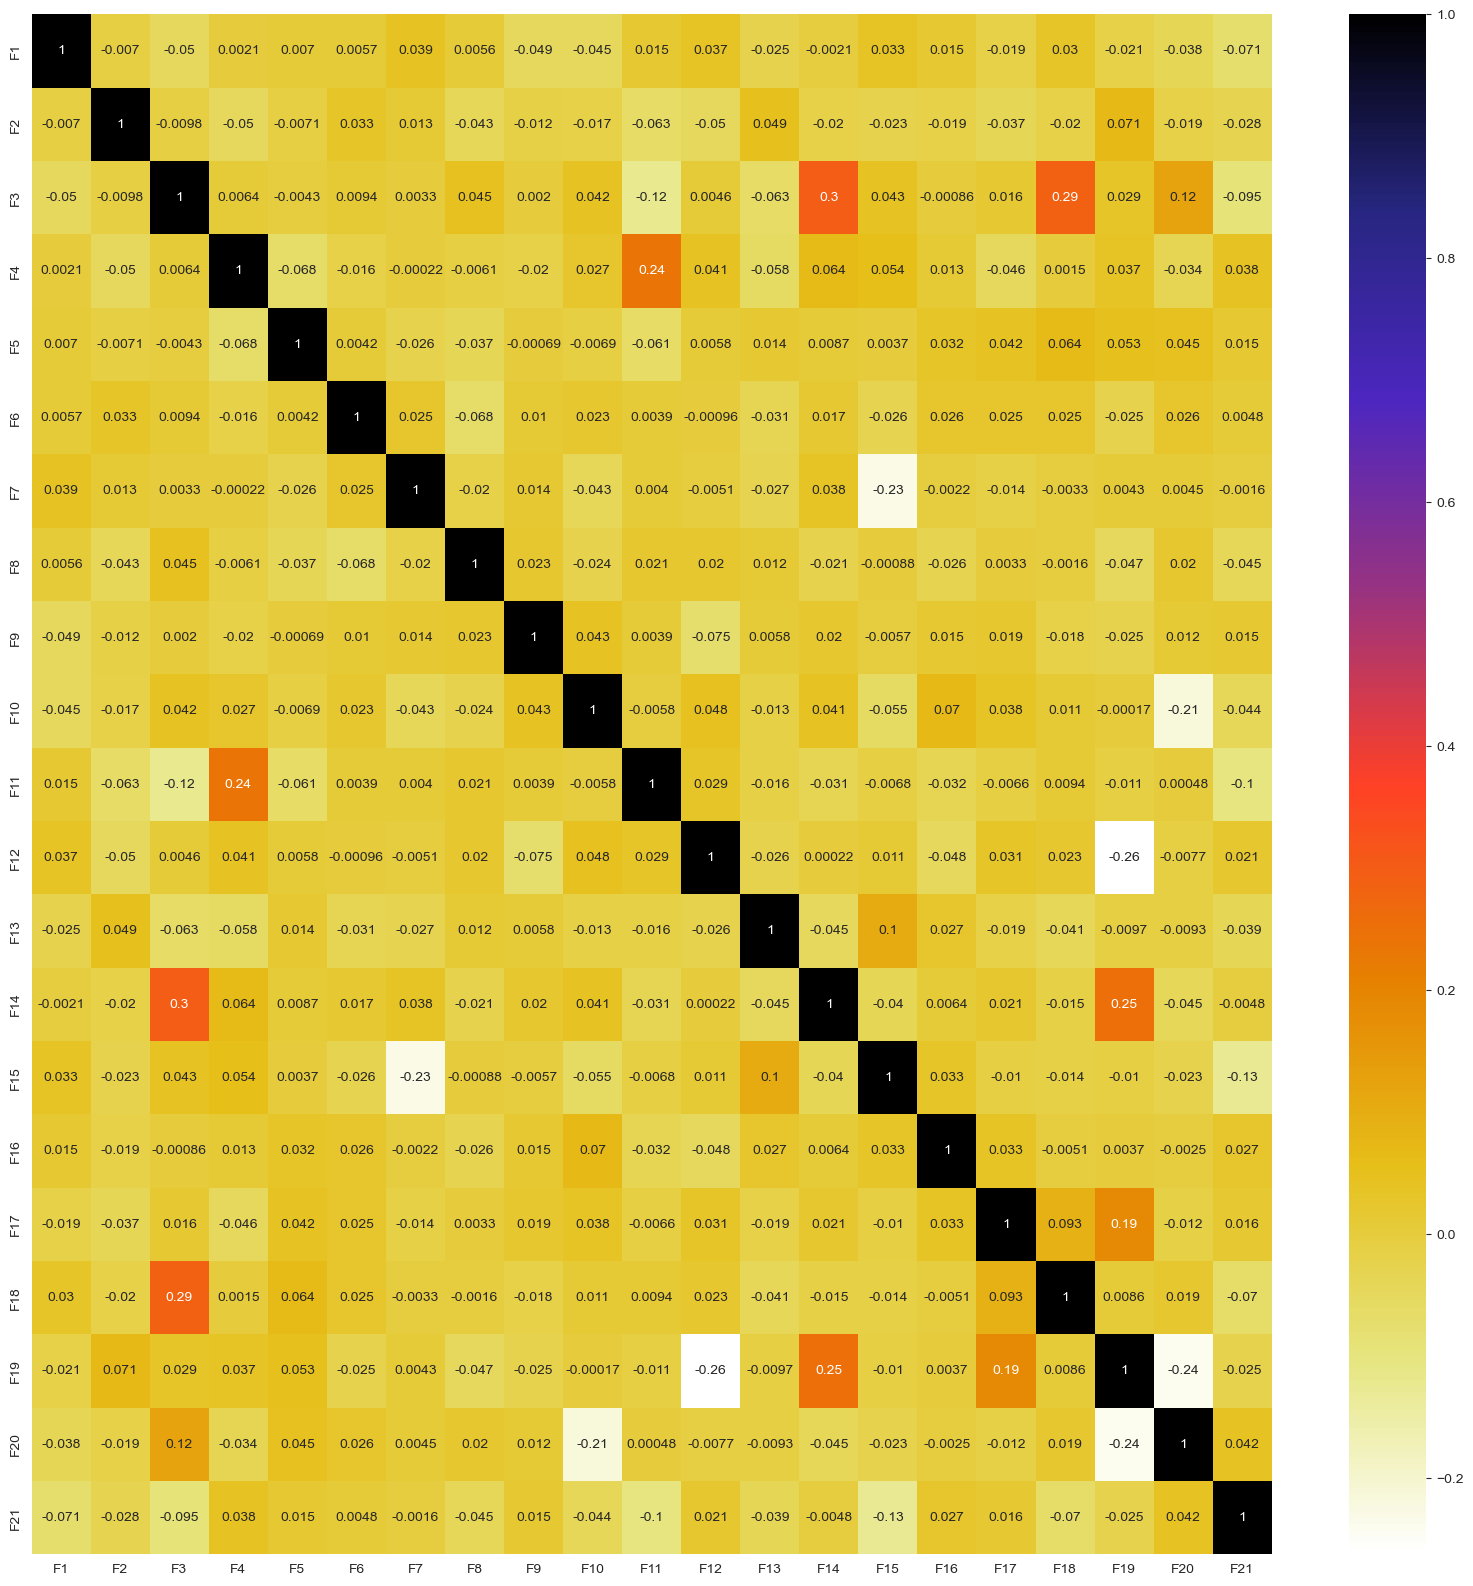

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In this heatmap we have not apply any type of scaling.
Here, we can see that F7,F9,F10,F13,F14,F16,F17,F21 are not much negative correleated whereas, rest of the feature are not much postive correleated.
So, we are going to find the skewness of the dataframe. And after that we are going to apply different feature scaling method's.

F1 Skewness: 1.4074154445258786


<Figure size 2000x1500 with 0 Axes>

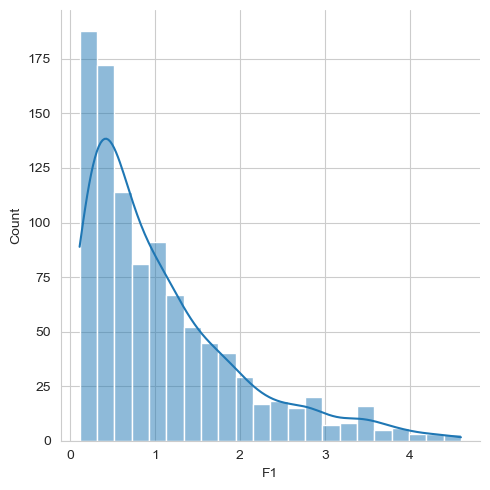

F2 Skewness: -0.02800274440343399


<Figure size 2000x1500 with 0 Axes>

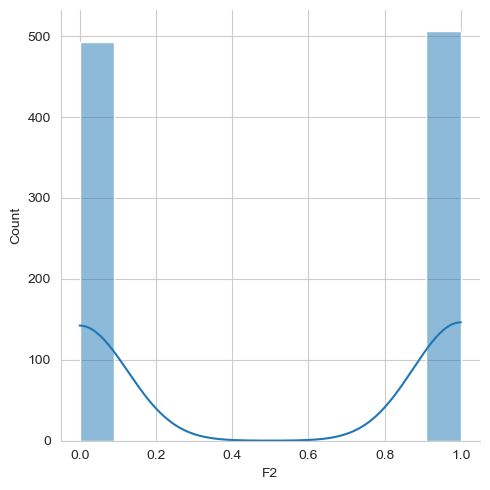

F3 Skewness: -2.470759191888928


<Figure size 2000x1500 with 0 Axes>

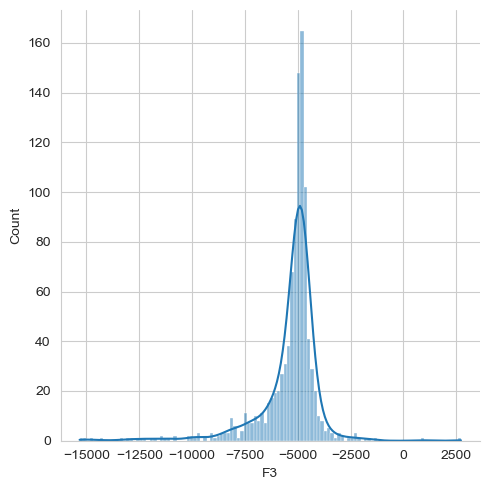

F4 Skewness: -1.5319688947031156


<Figure size 2000x1500 with 0 Axes>

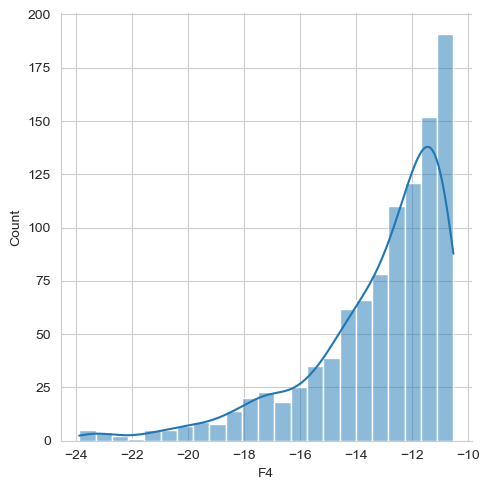

F5 Skewness: -1.0651953710839097


<Figure size 2000x1500 with 0 Axes>

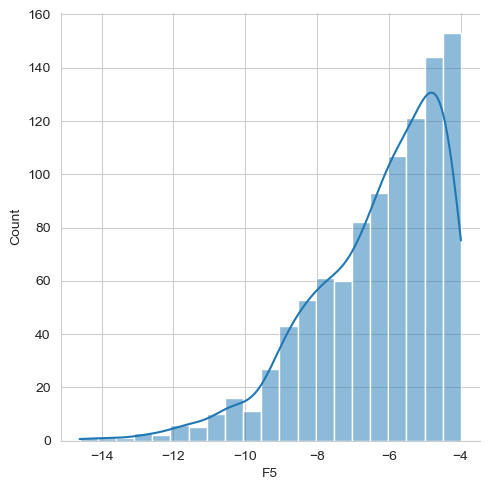

F6 Skewness: 0.07605493149797629


<Figure size 2000x1500 with 0 Axes>

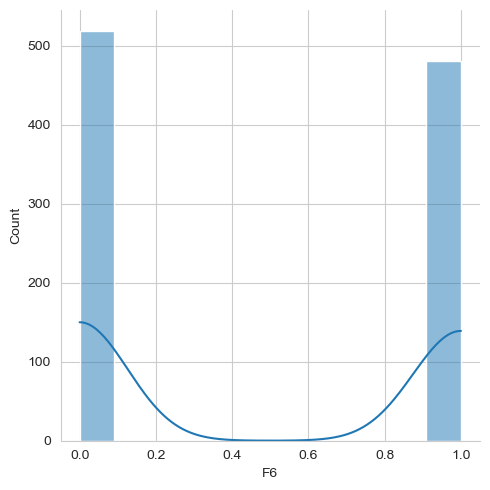

F7 Skewness: 1.3072417654679849


<Figure size 2000x1500 with 0 Axes>

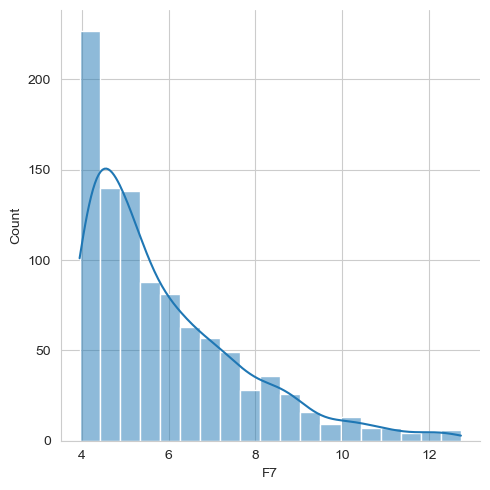

F8 Skewness: 0.03881655354810551


<Figure size 2000x1500 with 0 Axes>

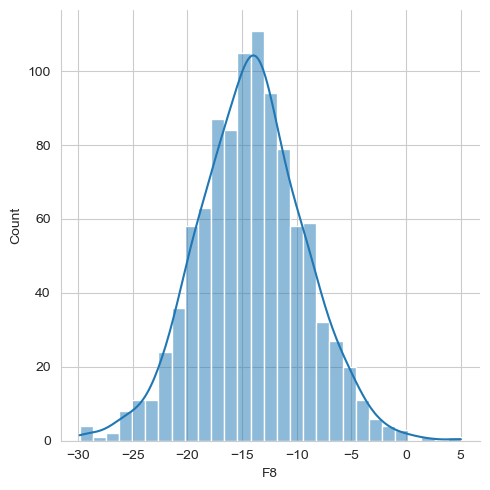

F9 Skewness: -2.1466118002914976


<Figure size 2000x1500 with 0 Axes>

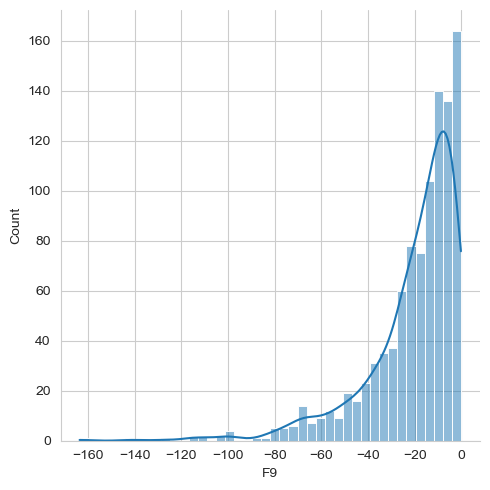

F10 Skewness: 1.4944155140883535


<Figure size 2000x1500 with 0 Axes>

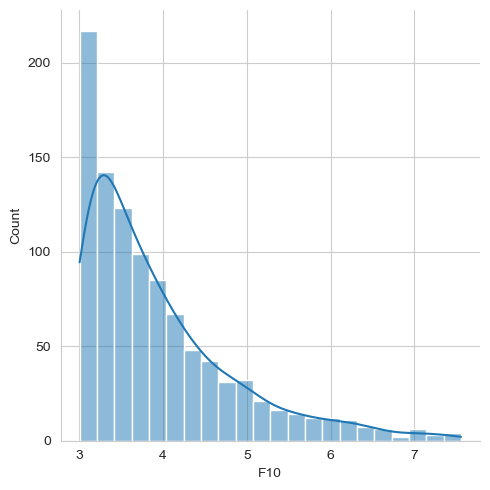

F11 Skewness: 3.530869510628868


<Figure size 2000x1500 with 0 Axes>

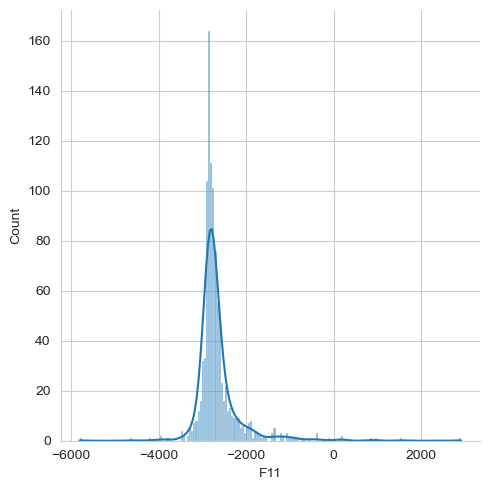

F12 Skewness: -1.3256902290211254


<Figure size 2000x1500 with 0 Axes>

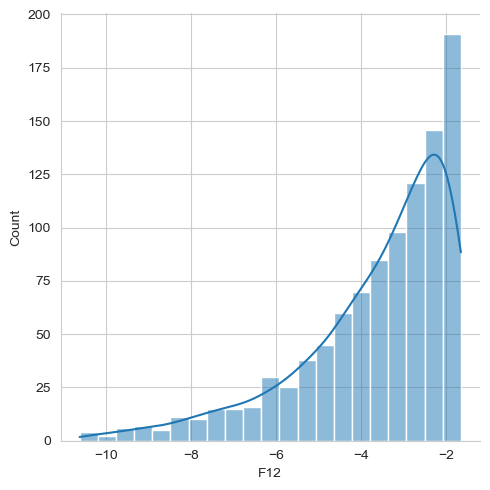

F13 Skewness: 2.63987774503233


<Figure size 2000x1500 with 0 Axes>

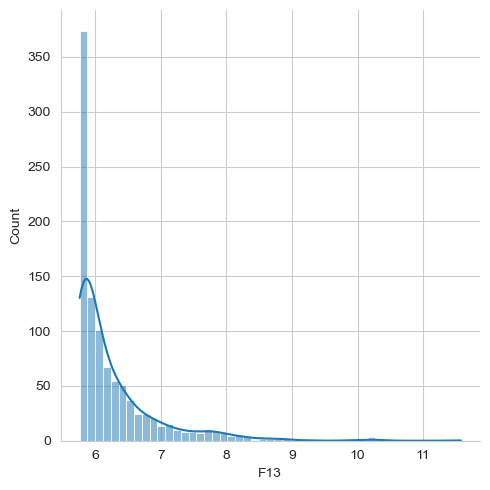

F14 Skewness: -0.809147010053332


<Figure size 2000x1500 with 0 Axes>

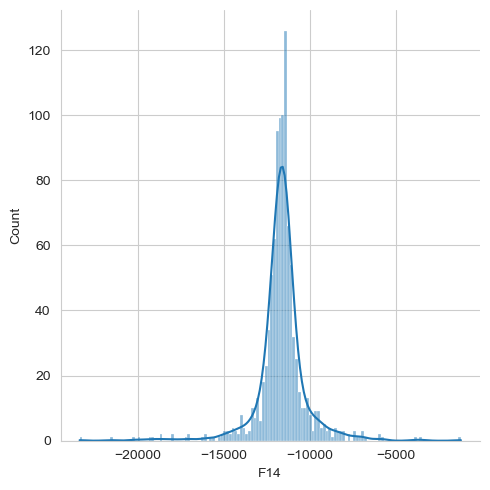

F15 Skewness: 2.414678244408687


<Figure size 2000x1500 with 0 Axes>

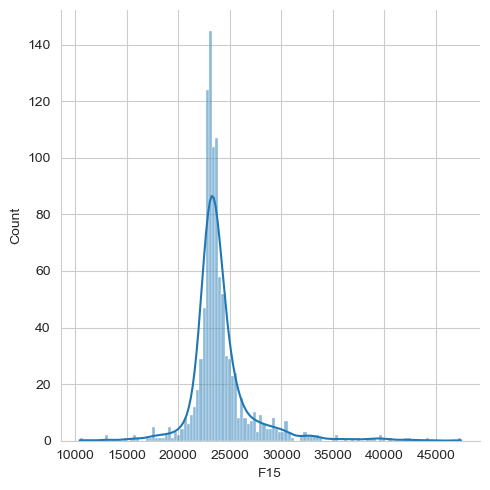

F16 Skewness: 0.1161956056516424


<Figure size 2000x1500 with 0 Axes>

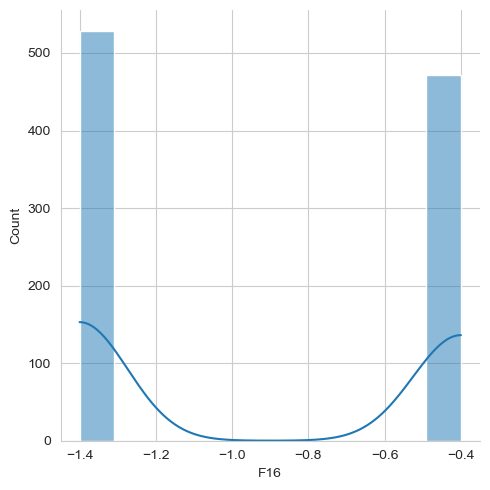

F17 Skewness: 30.492843302238843


<Figure size 2000x1500 with 0 Axes>

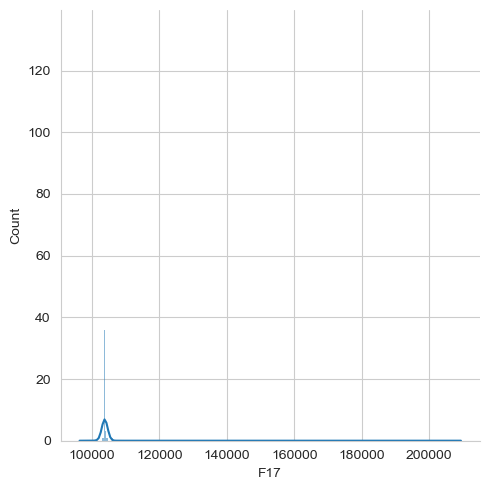

F18 Skewness: 1.4810072390859261


<Figure size 2000x1500 with 0 Axes>

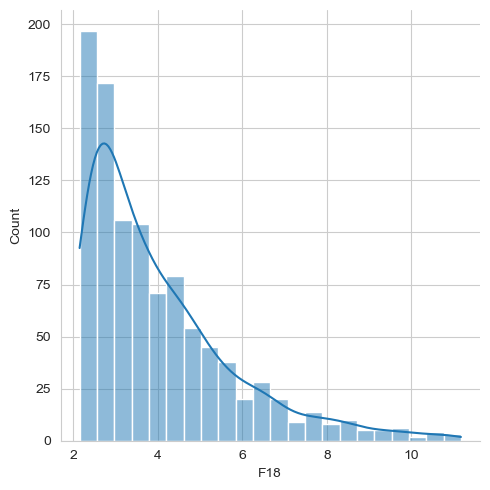

F19 Skewness: -2.2904708538757825


<Figure size 2000x1500 with 0 Axes>

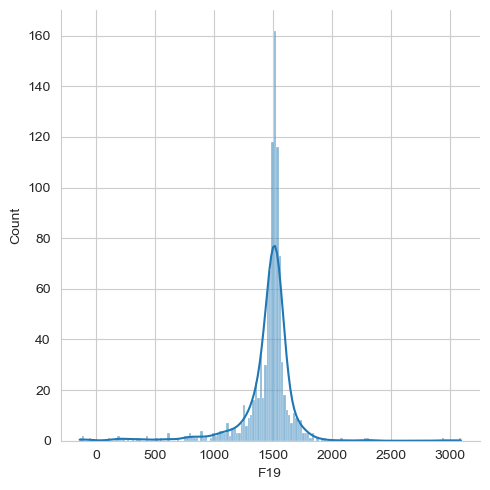

F20 Skewness: 2.259320229794503


<Figure size 2000x1500 with 0 Axes>

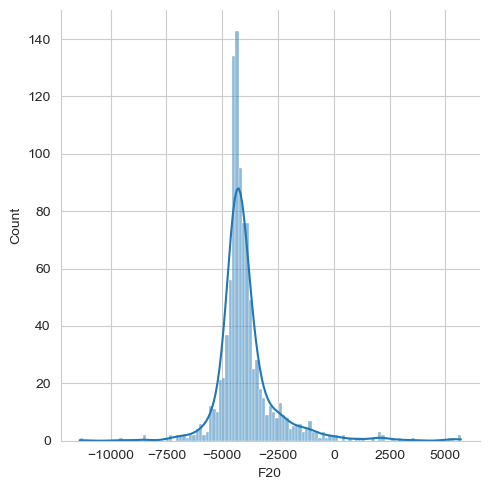

F21 Skewness: 0.2149350330472654


<Figure size 2000x1500 with 0 Axes>

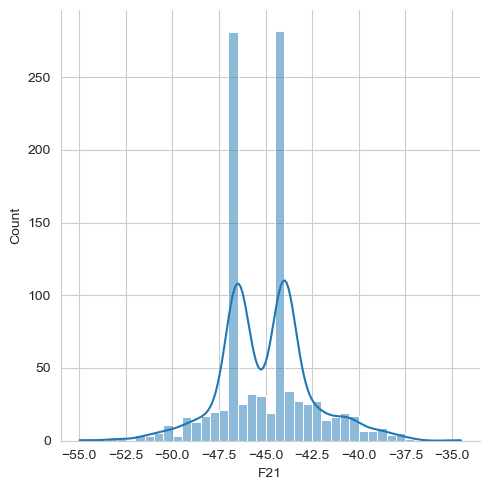

In [27]:
# Here, we are checking the skewness of the features. whether they are  positively or negatively skewed.

for col in df:
    print(col,'Skewness:',skew(df[col]))

    plt.figure(figsize=(20,15))
    sns.displot(df[col],kde=True)
    plt.show()


In [28]:
#F1,F6,F7,F10,F13,F15,F17,F18,F21 are Postive skew whereas, F2,F3,F4,F5,F9,F12,F19 are negative skew.
#So, we will apply different types of statistical methods to remove right & left skew.

df['F1'] = np.log(df['F1'])
df['F2'] = np.square(df['F2'])
df['F3'] = np.square(df['F3'])
df['F4'] = np.square(df['F4'])
df['F5'] = np.square(df['F5'])
df['F6'] = np.sqrt(df['F6'])
df['F7'] = np.log(df['F7'])
#df['F8'] = np.sqrt(df['F8'])
df['F9'] = np.square(df['F9'])
df['F10'] = np.log(df['F10'])
#df['F11'] = np.log(df['F11'])
df['F12'] = np.square(df['F12'])
df['F13'] = np.log(df['F13'])
#df['F14'] = np.square(df['F14'])
df['F15'] = np.log(df['F15'])
#df['F16'] = np.cbrt(df['F16'])
df['F17'] = np.log(df['F17'])
df['F18'] = np.log(df['F18'])
df['F19'] = np.square(df['F19'])
#df['F20'] = np.log(df['F20'])
df['F21'] = np.cbrt(df['F21'])


In [29]:
df['F21'].head()

0   -3.464401
1   -3.582009
2   -3.530348
3   -3.595983
4   -3.581229
Name: F21, dtype: float64

In [30]:
#After removing skewness, now we will apply some scaler  operationon like Standard scaler.
std = StandardScaler()
df_Scaled = pd.DataFrame(std.fit_transform(df),columns=df.columns)
df_Scaled.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,0.894027,-1.014099,-0.312844,-0.151354,-0.743480,-0.962695,-0.358074,-0.610859,1.635331,-0.305564,...,-0.603536,-0.743049,0.205240,-0.364675,1.059784,-0.044198,1.015389,1.448013,-0.673473,1.395313
1,-0.386758,-1.014099,-0.227909,1.041312,-1.001674,-0.962695,-0.732162,1.967750,-0.378177,-0.262761,...,1.074757,2.850996,-0.797055,0.598891,1.059784,-0.013379,0.845775,0.117246,-0.180049,-0.421250
2,-1.179157,-1.014099,0.815408,-0.553062,-0.193909,-0.962695,-0.944776,-0.117322,-0.409139,-0.290225,...,-0.272206,-0.784588,0.402961,-1.409821,-0.943588,0.030285,-1.158589,0.251678,-0.095285,0.376696
3,-0.962441,0.986097,-0.417119,-0.537439,-0.933675,-0.962695,1.662188,1.359420,-0.421776,-1.192771,...,-0.513573,0.367005,0.868612,-0.118807,-0.943588,-0.031160,0.467055,0.169731,3.762008,-0.637094
4,1.925412,-1.014099,-0.320255,-0.698778,0.796471,1.038750,0.379269,-0.090301,0.654086,-0.327988,...,0.485099,0.296064,0.067089,0.293302,-0.943588,-0.030990,-0.424164,0.546959,-0.827344,-0.409210


In [31]:
#Now, we are  splittling the datasets into Train & Test Split.
X_train,X_test,Y_train,Y_test = train_test_split(df_Scaled,Y,test_size=0.2)

# 5.Machine Learning Model's 

In [32]:
models_std = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
   # gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),

    # MultiClass Classifier
    multiclass.OutputCodeClassifier(SVC()),
    multiclass.OneVsOneClassifier(SVC()),
    multiclass.OneVsRestClassifier(SVC()),
 
    
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in models_std:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,RandomForestClassifier,1.0000,0.905,0.890244,0.879518,0.901297
1,AdaBoostClassifier,0.9512,0.900,0.879518,0.879518,0.897024
2,GradientBoostingClassifier,0.9975,0.890,0.867470,0.867470,0.886726
3,ExtraTreesClassifier,1.0000,0.885,0.875000,0.843373,0.878952
4,DecisionTreeClassifier,1.0000,0.875,0.862500,0.831325,0.868654
5,LogisticRegressionCV,0.8600,0.865,0.850000,0.819277,0.858357
6,LinearSVC,0.8588,0.865,0.841463,0.831325,0.860107
7,BaggingClassifier,0.9912,0.860,0.857143,0.795181,0.850582
8,SVC,0.9200,0.855,0.821429,0.831325,0.851560
9,OneVsOneClassifier,0.9200,0.855,0.821429,0.831325,0.851560


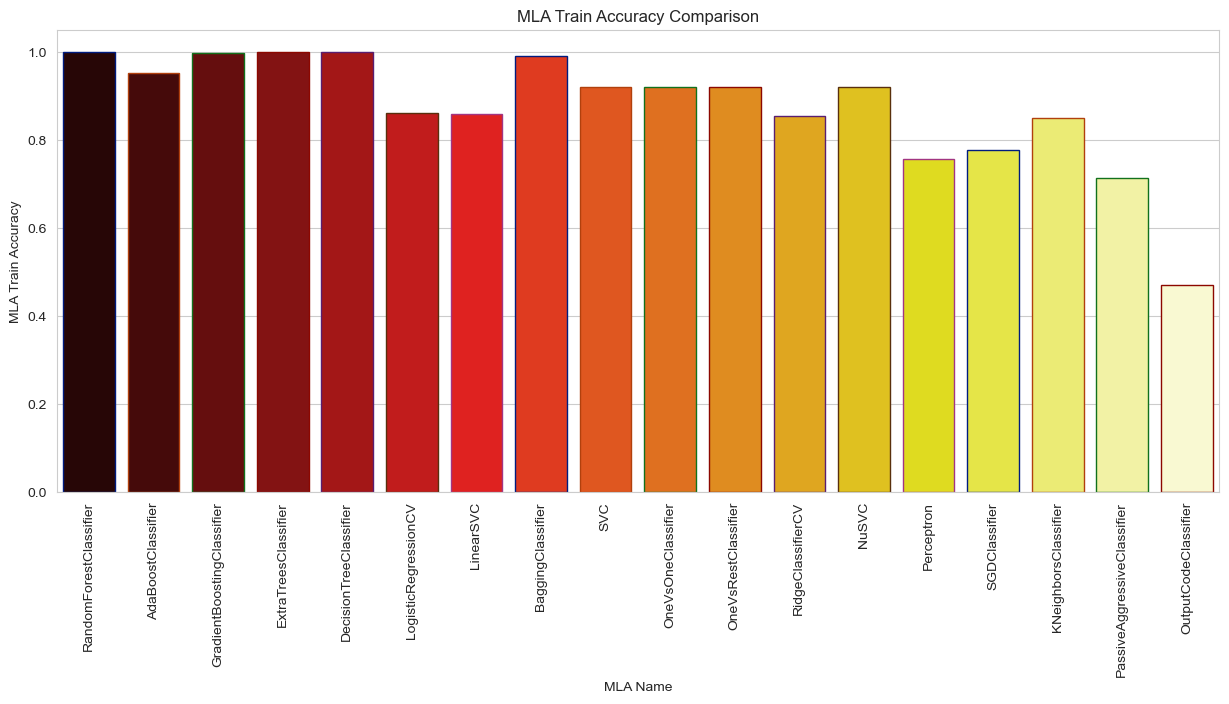

In [33]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

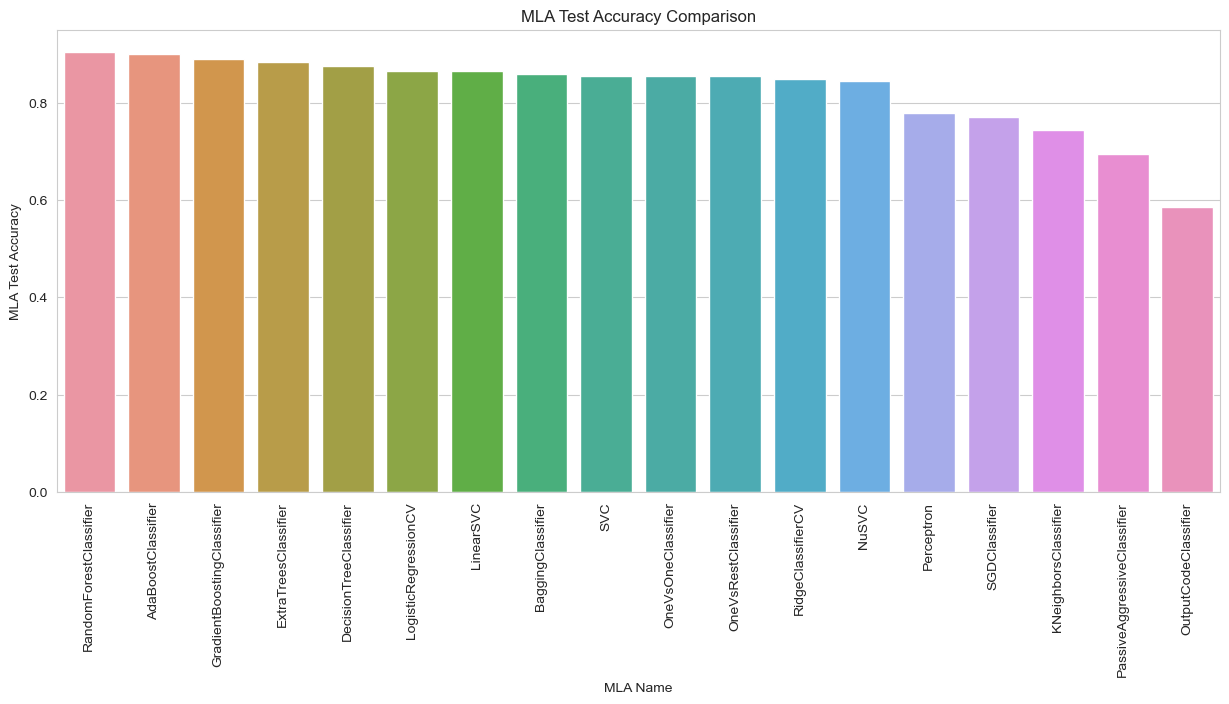

In [34]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

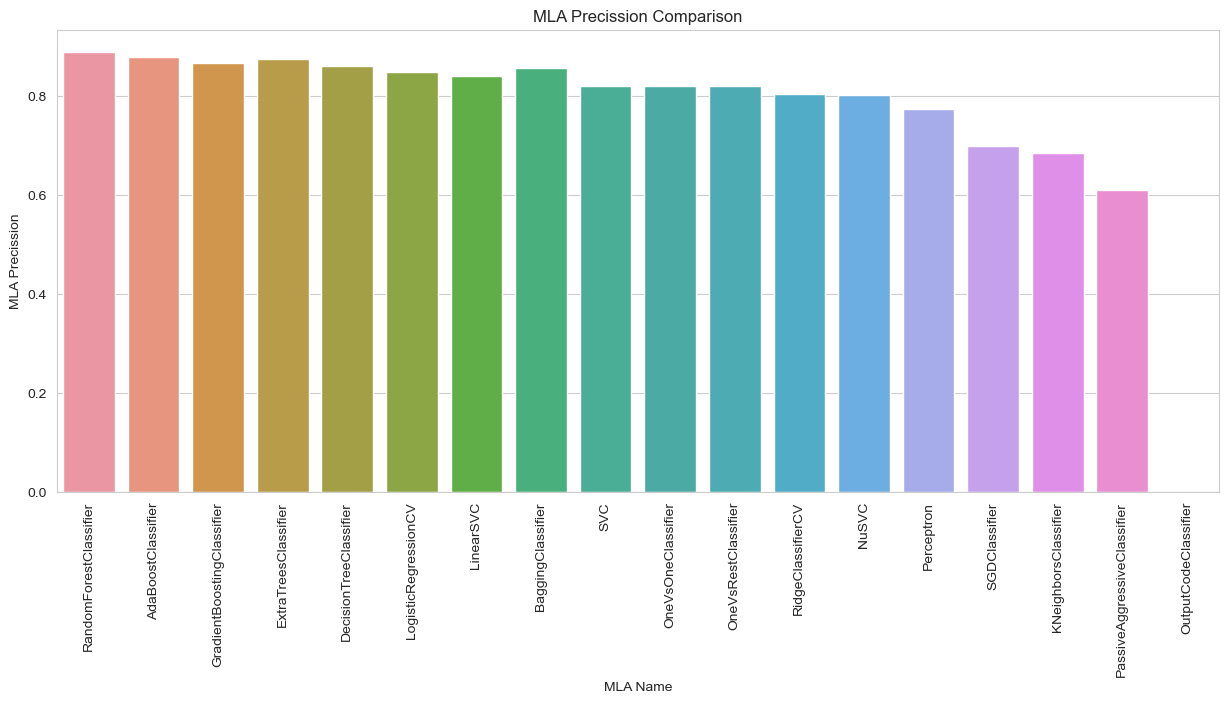

In [35]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

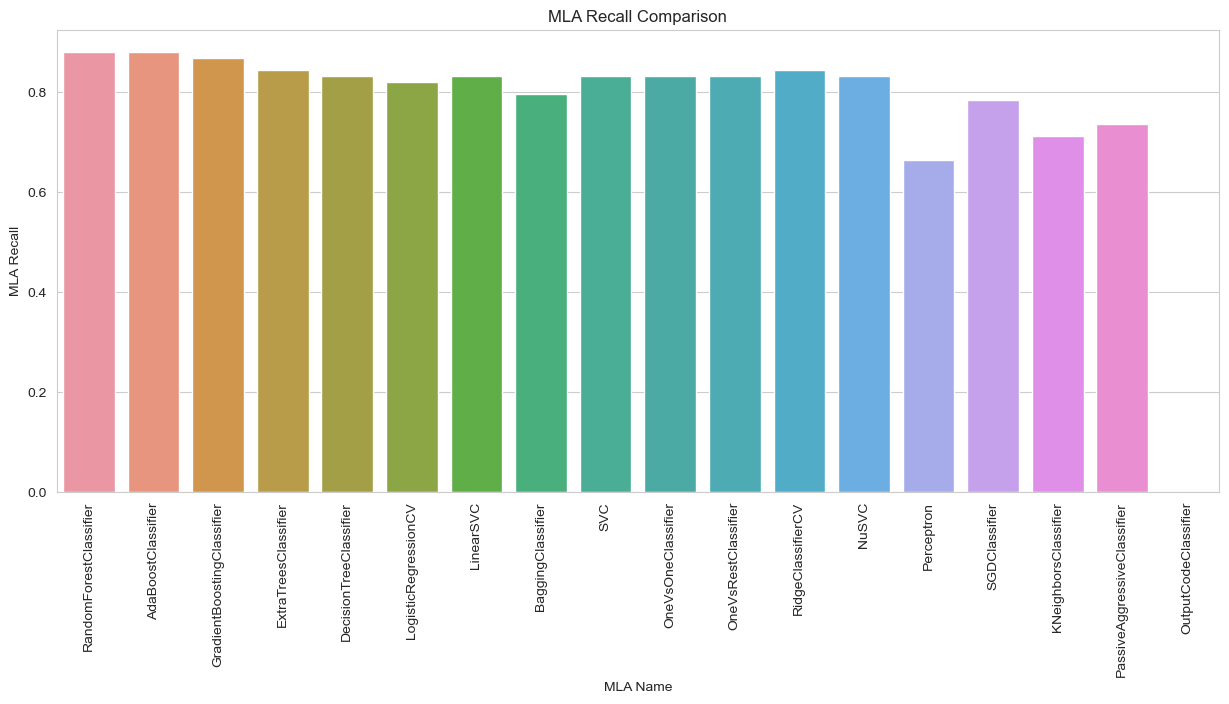

In [36]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

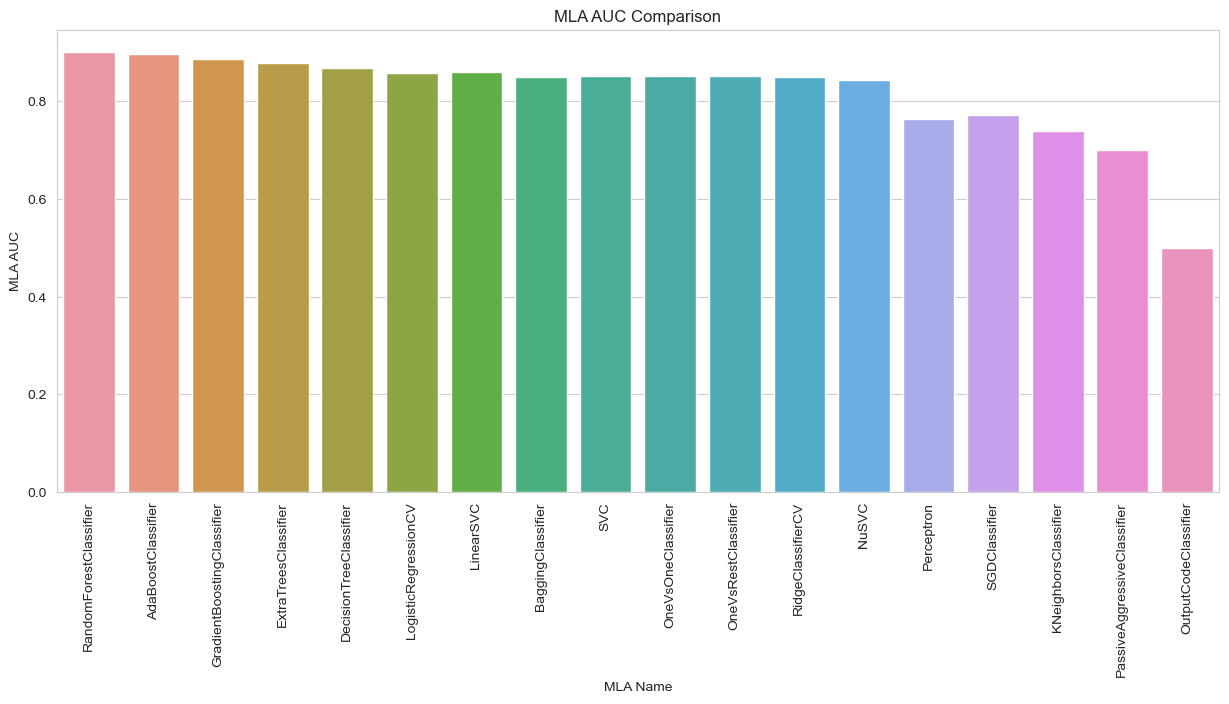

In [37]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

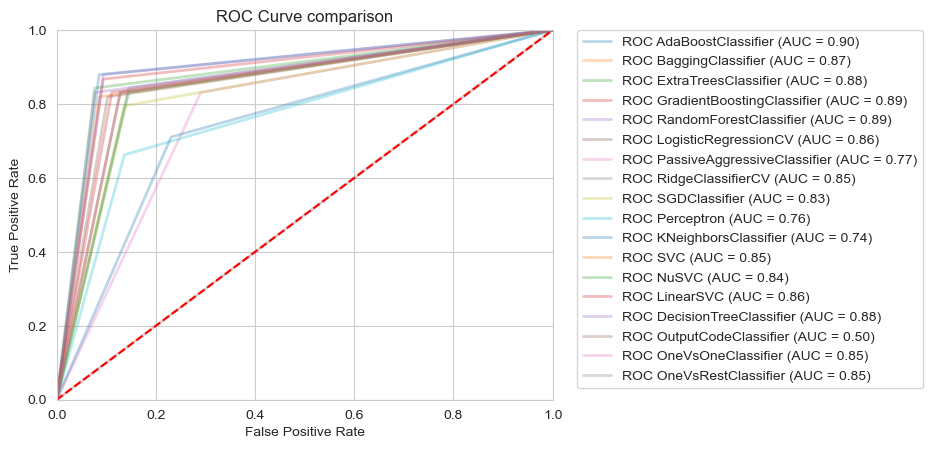

In [38]:
index = 1
for alg in models_std:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

# Here, we are taking 1 algorithm out of 17 which has highest Accuracy to make a predection on the test data.

In [39]:
def print_evaluate(true, predicted):  
    acc = metrics.accuracy_score(true, predicted)
    precision = metrics.precision_score(true, predicted)
    recall   = metrics.recall_score(true, predicted)
    f1 = metrics.f1_score(true, predicted)
    print('Accuracy:', acc)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score', f1)
    print('__________________________________')


GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
train_pred = GBC.predict(X_train)
test_pred = GBC.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(Y_train, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y_test, test_pred)

Train set evaluation:
_____________________________________
Accuracy: 0.9975
Precision: 0.9976359338061466
Recall: 0.9976359338061466
F1-Score 0.9976359338061466
__________________________________
Test set evaluation:
_____________________________________
Accuracy: 0.89
Precision: 0.8674698795180723
Recall: 0.8674698795180723
F1-Score 0.8674698795180723
__________________________________


# 6.Saving the model 

In [40]:
import pickle

with open('model','wb') as f:
    pickle.dump(GBC,f)

In [41]:
# Load the pickled model
with open('model','rb') as f:
    model = pickle.load(f)

# Part B

# 7.Test Data

In [42]:
test_df = pd.read_csv('CE802_P2_Test.csv')
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.56200,1,-4522.64,-10.7841,-6.70380,1,5.4270,-9.679,-18.5660,5.86600,...,5.761109,-11347.230,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,NaN,NaN
1,1.84000,1,-3893.64,-12.6885,-7.98300,0,4.5008,-11.561,-25.9200,3.18100,...,6.797000,-11289.360,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91,NaN
2,0.37820,1,-4916.46,-11.9391,-5.11320,1,5.3808,-13.281,-20.2400,3.04817,...,6.922000,-11133.060,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66,NaN
3,1.14100,0,-8705.44,-10.9737,-6.95640,1,6.5020,-12.101,-13.6260,3.28770,...,9.260000,-11773.530,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26,NaN
4,1.43600,1,-6963.44,-15.9780,-10.24200,1,4.2970,-11.596,-14.6240,3.55760,...,5.997600,-11937.060,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.42190,1,-3638.64,-15.7710,-4.16595,0,7.3160,-19.894,-73.3600,5.45900,...,5.778300,-10418.160,23734.14,-1.4,103839.18,2.9136,1518.3900,-4146.08,NaN,NaN
996,0.12335,0,-4821.32,-13.9560,-8.34000,0,4.7972,-7.204,-79.4200,3.37930,...,7.407000,-15800.760,25006.44,-0.4,103840.60,10.8800,1520.1000,-4665.08,-45.93,NaN
997,0.11780,1,-4677.82,-11.5935,-4.02435,1,8.0940,-12.809,-1.9182,3.06420,...,5.960300,-4070.760,23033.76,-0.4,103993.70,9.6960,1493.1800,552.52,-43.92,NaN
998,1.53400,0,-4893.36,-20.8680,-4.89450,1,5.1574,-18.655,-6.2880,3.91770,...,6.199500,-11618.257,22637.34,-0.4,103845.43,3.4610,1483.6500,-4203.62,-44.46,NaN


In [43]:
print(test_df.shape)

(1000, 22)


In [44]:
#Making a copy of original dataset's.
test_data = test_df.iloc[:,:-1].copy()

In [45]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,1.56200,1,-4522.64,-10.7841,-6.70380,1,5.4270,-9.679,-18.5660,5.86600,...,-1.84740,5.761109,-11347.230,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,NaN
1,1.84000,1,-3893.64,-12.6885,-7.98300,0,4.5008,-11.561,-25.9200,3.18100,...,-2.91880,6.797000,-11289.360,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91
2,0.37820,1,-4916.46,-11.9391,-5.11320,1,5.3808,-13.281,-20.2400,3.04817,...,-3.90400,6.922000,-11133.060,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66
3,1.14100,0,-8705.44,-10.9737,-6.95640,1,6.5020,-12.101,-13.6260,3.28770,...,-6.14800,9.260000,-11773.530,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26
4,1.43600,1,-6963.44,-15.9780,-10.24200,1,4.2970,-11.596,-14.6240,3.55760,...,-1.64318,5.997600,-11937.060,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.42190,1,-3638.64,-15.7710,-4.16595,0,7.3160,-19.894,-73.3600,5.45900,...,-7.54400,5.778300,-10418.160,23734.14,-1.4,103839.18,2.9136,1518.3900,-4146.08,NaN
996,0.12335,0,-4821.32,-13.9560,-8.34000,0,4.7972,-7.204,-79.4200,3.37930,...,-5.81800,7.407000,-15800.760,25006.44,-0.4,103840.60,10.8800,1520.1000,-4665.08,-45.93
997,0.11780,1,-4677.82,-11.5935,-4.02435,1,8.0940,-12.809,-1.9182,3.06420,...,-3.49440,5.960300,-4070.760,23033.76,-0.4,103993.70,9.6960,1493.1800,552.52,-43.92
998,1.53400,0,-4893.36,-20.8680,-4.89450,1,5.1574,-18.655,-6.2880,3.91770,...,-3.05380,6.199500,-11618.257,22637.34,-0.4,103845.43,3.4610,1483.6500,-4203.62,-44.46


In [46]:
#Filling the nan values by Mean in the test_data.After  that applying standard scaler on the test_data.
test_data = test_data.fillna(test_data.mean())
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
0,1.56200,1,-4522.64,-10.7841,-6.70380,1,5.4270,-9.679,-18.5660,5.86600,...,-1.84740,5.761109,-11347.230,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,-44.68914
1,1.84000,1,-3893.64,-12.6885,-7.98300,0,4.5008,-11.561,-25.9200,3.18100,...,-2.91880,6.797000,-11289.360,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91000
2,0.37820,1,-4916.46,-11.9391,-5.11320,1,5.3808,-13.281,-20.2400,3.04817,...,-3.90400,6.922000,-11133.060,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66000
3,1.14100,0,-8705.44,-10.9737,-6.95640,1,6.5020,-12.101,-13.6260,3.28770,...,-6.14800,9.260000,-11773.530,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26000
4,1.43600,1,-6963.44,-15.9780,-10.24200,1,4.2970,-11.596,-14.6240,3.55760,...,-1.64318,5.997600,-11937.060,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.42190,1,-3638.64,-15.7710,-4.16595,0,7.3160,-19.894,-73.3600,5.45900,...,-7.54400,5.778300,-10418.160,23734.14,-1.4,103839.18,2.9136,1518.3900,-4146.08,-44.68914
996,0.12335,0,-4821.32,-13.9560,-8.34000,0,4.7972,-7.204,-79.4200,3.37930,...,-5.81800,7.407000,-15800.760,25006.44,-0.4,103840.60,10.8800,1520.1000,-4665.08,-45.93000
997,0.11780,1,-4677.82,-11.5935,-4.02435,1,8.0940,-12.809,-1.9182,3.06420,...,-3.49440,5.960300,-4070.760,23033.76,-0.4,103993.70,9.6960,1493.1800,552.52,-43.92000
998,1.53400,0,-4893.36,-20.8680,-4.89450,1,5.1574,-18.655,-6.2880,3.91770,...,-3.05380,6.199500,-11618.257,22637.34,-0.4,103845.43,3.4610,1483.6500,-4203.62,-44.46000


In [47]:
test_data = std.fit_transform(test_data)
test_data

array([[ 5.68933136e-01,  9.78236762e-01,  5.29264243e-01, ...,
        -3.60779927e-02, -1.96049255e-01, -3.18127399e-15],
       [ 8.76977323e-01,  9.78236762e-01,  9.36393659e-01, ...,
         5.67567044e-01, -5.67344475e-01, -9.88844355e-02],
       [-7.42803226e-01,  9.78236762e-01,  2.74358509e-01, ...,
         2.92837994e-01, -1.64230678e-01, -4.34677819e-01],
       ...,
       [-1.03134534e+00,  9.78236762e-01,  4.28821726e-01, ...,
         7.95009108e-02,  3.14159058e+00,  3.44362830e-01],
       [ 5.37907103e-01, -1.02224741e+00,  2.89310320e-01, ...,
         3.88713664e-02, -1.52567099e-01,  1.02591594e-01],
       [ 3.14076435e-01,  9.78236762e-01,  9.68915079e-02, ...,
         6.08750821e-01, -2.05715200e+00, -3.18127399e-15]])

In [49]:
#Calling the save model to predict on the test_data.
y_final = model.predict(test_data)
test_df['Class'] = y_final.tolist()

In [50]:
#Converting the 0 & 1 Values into False & True
test_df.replace({'Class': {0: False, 1:True}}, inplace=True)
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,1.56200,1,-4522.64,-10.7841,-6.70380,1,5.4270,-9.679,-18.5660,5.86600,...,5.761109,-11347.230,22929.33,-0.4,103741.46,4.0760,1466.0700,-4266.40,NaN,False
1,1.84000,1,-3893.64,-12.6885,-7.98300,0,4.5008,-11.561,-25.9200,3.18100,...,6.797000,-11289.360,25723.74,-1.4,103858.01,2.6546,1607.6600,-4802.48,-44.91,True
2,0.37820,1,-4916.46,-11.9391,-5.11320,1,5.3808,-13.281,-20.2400,3.04817,...,6.922000,-11133.060,23138.58,-0.4,105361.06,5.6300,1543.2200,-4220.46,-45.66,True
3,1.14100,0,-8705.44,-10.9737,-6.95640,1,6.5020,-12.101,-13.6260,3.28770,...,9.260000,-11773.530,23100.78,-0.4,103835.75,2.3680,1532.0397,-4612.88,-43.26,False
4,1.43600,1,-6963.44,-15.9780,-10.24200,1,4.2970,-11.596,-14.6240,3.55760,...,5.997600,-11937.060,27299.64,-1.4,103877.64,2.6908,1084.3200,-4557.08,-44.82,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.42190,1,-3638.64,-15.7710,-4.16595,0,7.3160,-19.894,-73.3600,5.45900,...,5.778300,-10418.160,23734.14,-1.4,103839.18,2.9136,1518.3900,-4146.08,NaN,False
996,0.12335,0,-4821.32,-13.9560,-8.34000,0,4.7972,-7.204,-79.4200,3.37930,...,7.407000,-15800.760,25006.44,-0.4,103840.60,10.8800,1520.1000,-4665.08,-45.93,False
997,0.11780,1,-4677.82,-11.5935,-4.02435,1,8.0940,-12.809,-1.9182,3.06420,...,5.960300,-4070.760,23033.76,-0.4,103993.70,9.6960,1493.1800,552.52,-43.92,False
998,1.53400,0,-4893.36,-20.8680,-4.89450,1,5.1574,-18.655,-6.2880,3.91770,...,6.199500,-11618.257,22637.34,-0.4,103845.43,3.4610,1483.6500,-4203.62,-44.46,False


In [51]:
# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

In [52]:
# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])